In [1]:
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 1. Load and Combine Individual Files into Full Dataset
files = {
    "Abhay": "Abhay.csv", "Abhijith": "Abhijith.csv", "Ashna": "Ashna.csv",
    "Gaavya": "Gaavya.csv", "Kavya": "Kavya.csv", "Krishnanand": "Krishnanand.csv",
    "Ragesh": "Ragesh.csv", "SreeMegha": "SreeMegha.csv", "Vinayak": "Vinayak.csv",
    "Vishnu": "Vishnu.csv"
}
genders = {
    "Abhay": "Male", "Abhijith": "Male", "Ashna": "Female", "Gaavya": "Female",
    "Kavya": "Female", "Krishnanand": "Male", "Ragesh": "Male", 
    "SreeMegha": "Female", "Vinayak": "Male", "Vishnu": "Male"
}
combined_data = []
for subject, filepath in files.items():
    df = pd.read_csv(filepath)
    df["Subject"] = subject
    df["Gender"] = genders[subject]
    combined_data.append(df)

full_dataset = pd.concat(combined_data, ignore_index=True)

In [3]:
# 2. Reshape Data for ANOVA and Comparisons
reshaped_data = full_dataset.melt(
    id_vars=['Subject', 'Gender'], 
    var_name='Measurement', 
    value_name='Value'
)
reshaped_data['Joint'] = reshaped_data['Measurement'].str.extract(r'_(\w+)$')
reshaped_data['Side'] = reshaped_data['Measurement'].apply(lambda x: 'Left' if '_L' in x else 'Right')
print(reshaped_data['Measurement'].str.extract(r'_(\w+)$').value_counts())


LA    276642
LH    276642
LK    276642
RA    276642
RH    276642
RK    276642
dtype: int64


In [4]:
# 3. Correlation Matrix
columns_of_interest = [col for col in full_dataset.columns if 'X (m/s2)' in col or 'Y (m/s2)' in col or 'Z (m/s2)' in col]
correlation_matrix = full_dataset[columns_of_interest].corr()
print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
             X (m/s2)_LK  Y (m/s2)_LK  Z (m/s2)_LK  X (m/s2)_LH  Y (m/s2)_LH  \
X (m/s2)_LK     1.000000    -0.558068    -0.214015     0.092901    -0.068757   
Y (m/s2)_LK    -0.558068     1.000000     0.163866     0.012145    -0.026359   
Z (m/s2)_LK    -0.214015     0.163866     1.000000     0.022953     0.022464   
X (m/s2)_LH     0.092901     0.012145     0.022953     1.000000    -0.086280   
Y (m/s2)_LH    -0.068757    -0.026359     0.022464    -0.086280     1.000000   
Z (m/s2)_LH     0.173207     0.038564    -0.038953     0.161784    -0.448082   
X (m/s2)_RH    -0.047281     0.016783    -0.082791    -0.296902     0.059313   
Y (m/s2)_RH     0.100462    -0.099943     0.312801     0.329948     0.013331   
Z (m/s2)_RH     0.170139     0.055880    -0.212366     0.243830    -0.219563   
X (m/s2)_RK    -0.107305     0.071049    -0.160276    -0.037761     0.022520   
Y (m/s2)_RK    -0.060494     0.031955    -0.061908    -0.021156     0.000871   
Z (m/s2)_RK    -0.03

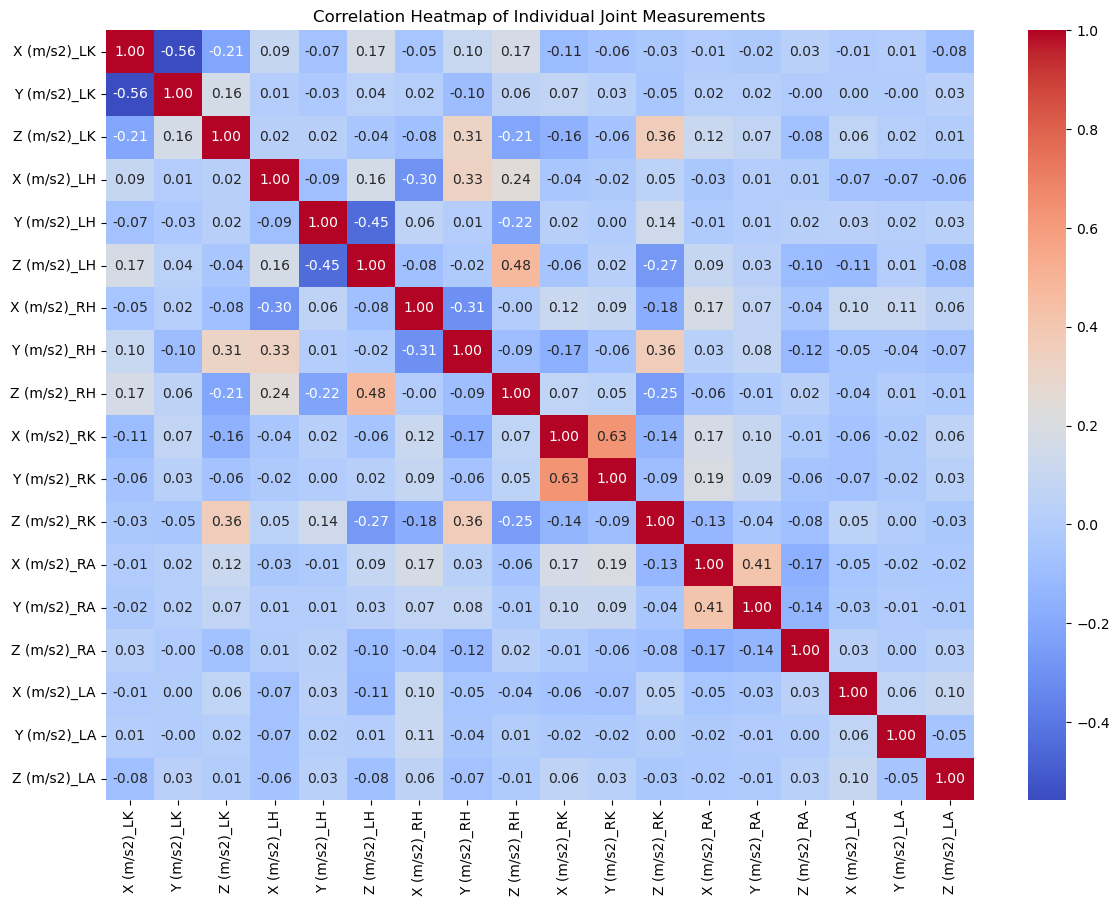

In [5]:
# 4. Plot Correlations Between Individual Joint Pairs
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", cbar=True)
plt.title('Correlation Heatmap of Individual Joint Measurements')
plt.show()

In [6]:
# 5. Helper Function for ANOVA
def perform_anova(group_col, data):
    groups = [values["Value"].values for _, values in data.groupby(group_col)]
    result = stats.f_oneway(*groups)
    return {"ANOVA Statistic": result.statistic, "p-value": result.pvalue}


In [7]:
# 6. Two-Way ANOVA Comparisons
anova_joints = perform_anova("Joint", reshaped_data)
print("\nANOVA: Between and Within Joints")
print(anova_joints)

anova_subjects = perform_anova("Subject", reshaped_data)
print("\nANOVA: Between and Within Subjects")
print(anova_subjects)

anova_left_right = perform_anova("Side", reshaped_data)
print("\nANOVA: Left vs Right Joints")
print(anova_left_right)

anova_gender = perform_anova("Gender", reshaped_data)
print("\nANOVA: Male vs Female Joints")
print(anova_gender)


ANOVA: Between and Within Joints
{'ANOVA Statistic': 696.7771497653539, 'p-value': 0.0}

ANOVA: Between and Within Subjects
{'ANOVA Statistic': 15.770267898510301, 'p-value': 4.127033529564024e-26}

ANOVA: Left vs Right Joints
{'ANOVA Statistic': 500.31630632855575, 'p-value': 8.425276821391748e-111}

ANOVA: Male vs Female Joints
{'ANOVA Statistic': 4.527693035833758, 'p-value': 0.03335069411235399}


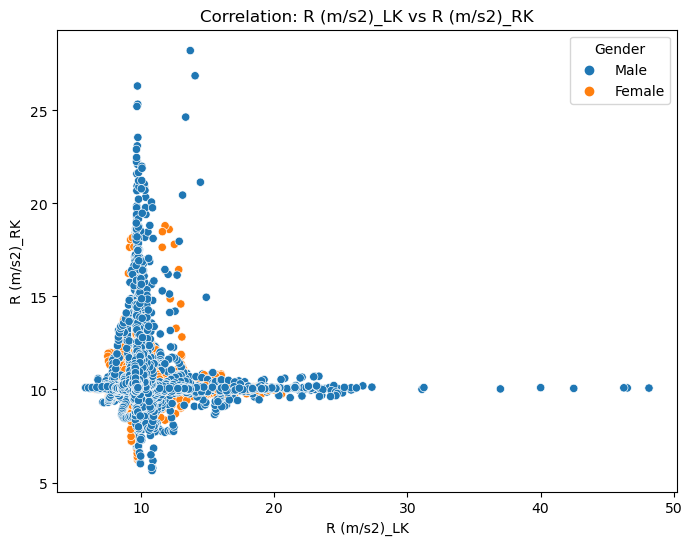

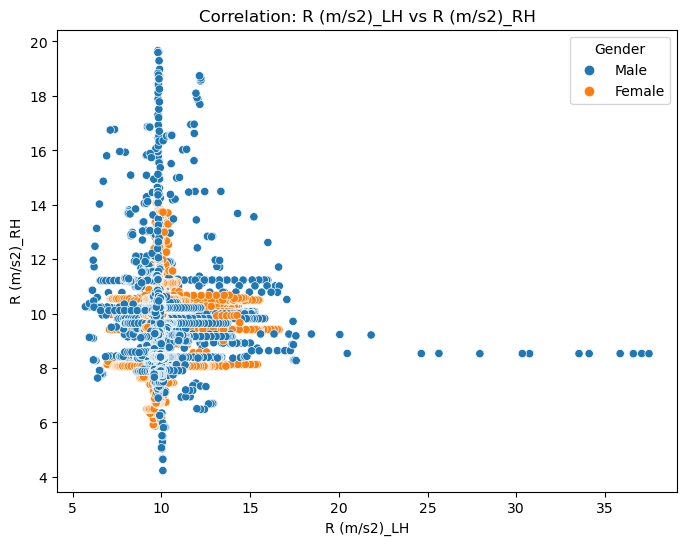

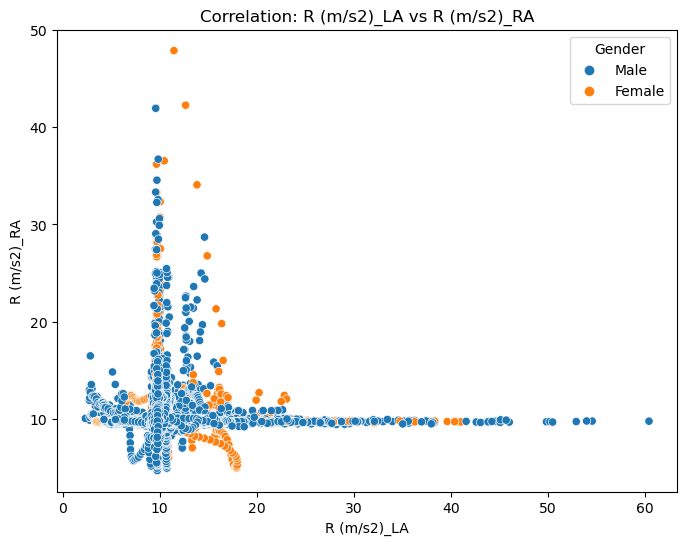

In [8]:
# 7. Pairwise Joint Correlation Plots
joint_pairs = [
    ('R (m/s2)_LK', 'R (m/s2)_RK'), 
    ('R (m/s2)_LH', 'R (m/s2)_RH'), 
    ('R (m/s2)_LA', 'R (m/s2)_RA')
]

for joint1, joint2 in joint_pairs:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=full_dataset, x=joint1, y=joint2, hue='Gender')
    plt.title(f'Correlation: {joint1} vs {joint2}')
    plt.show()


correlation differ across genders

In [9]:
# 1. Split the dataset by Gender
male_data = full_dataset[full_dataset["Gender"] == "Male"]
female_data = full_dataset[full_dataset["Gender"] == "Female"]

In [10]:
# 2. Compute correlation matrices for each gender
male_corr = male_data[columns_of_interest].corr()
female_corr = female_data[columns_of_interest].corr()

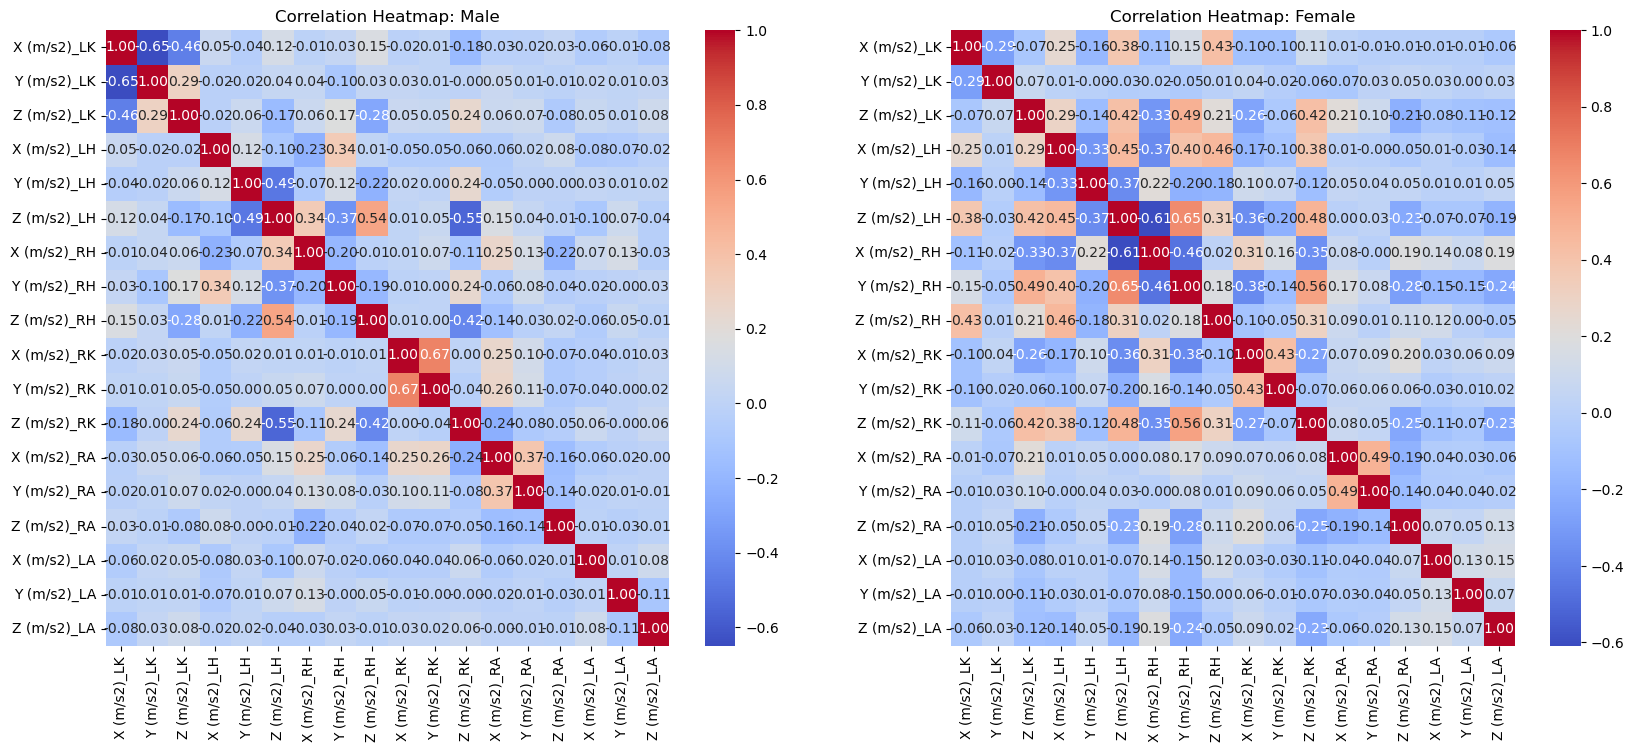

In [11]:
# 3. Plot Correlation Heatmaps for Male and Female
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

sns.heatmap(male_corr, ax=axes[0], annot=True, cmap="coolwarm", fmt=".2f", cbar=True)
axes[0].set_title("Correlation Heatmap: Male")

sns.heatmap(female_corr, ax=axes[1], annot=True, cmap="coolwarm", fmt=".2f", cbar=True)
axes[1].set_title("Correlation Heatmap: Female")

plt.show()


In [12]:

# 4. Optional: Calculate the Difference in Correlations between Genders
corr_diff = male_corr - female_corr

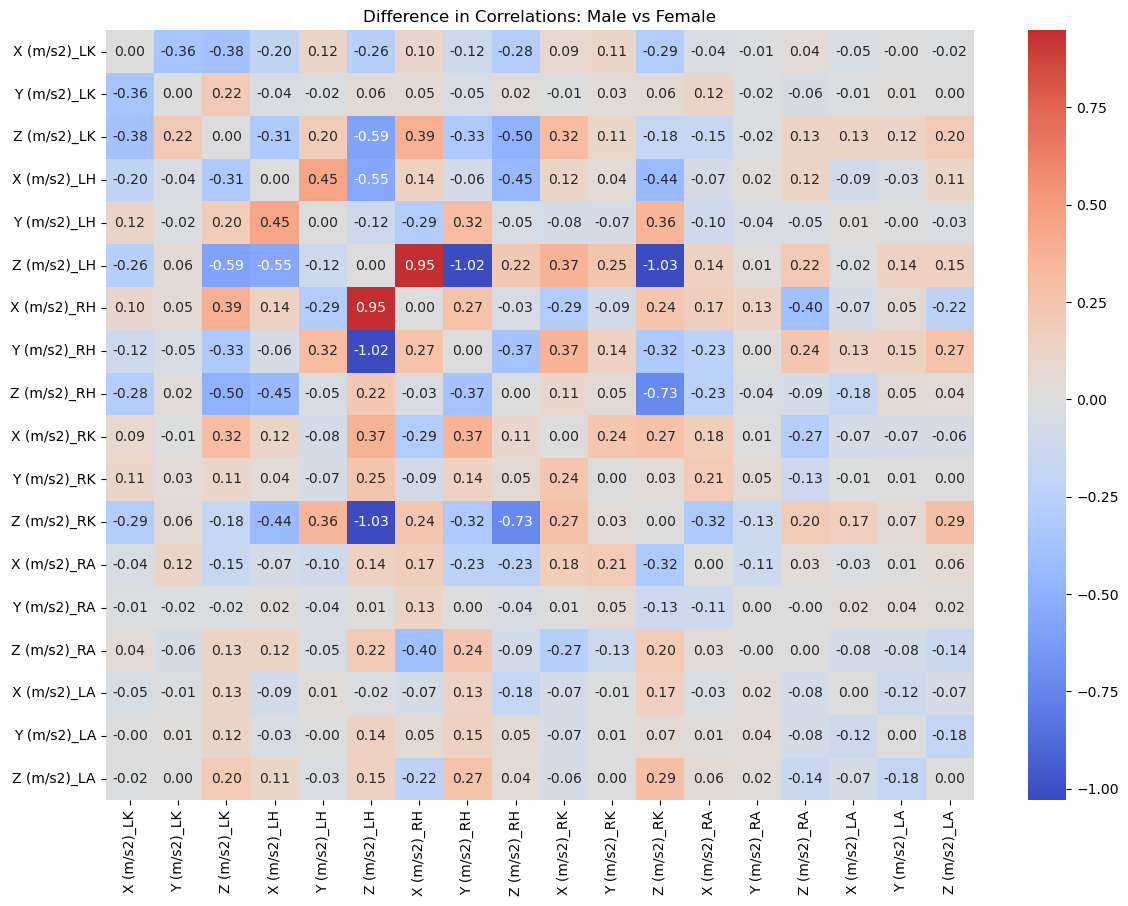

In [13]:
# 5. Plot the Correlation Difference
plt.figure(figsize=(14, 10))
sns.heatmap(corr_diff, annot=True, cmap="coolwarm", fmt=".2f", center=0, cbar=True)
plt.title('Difference in Correlations: Male vs Female')
plt.show()


time-based subject trends

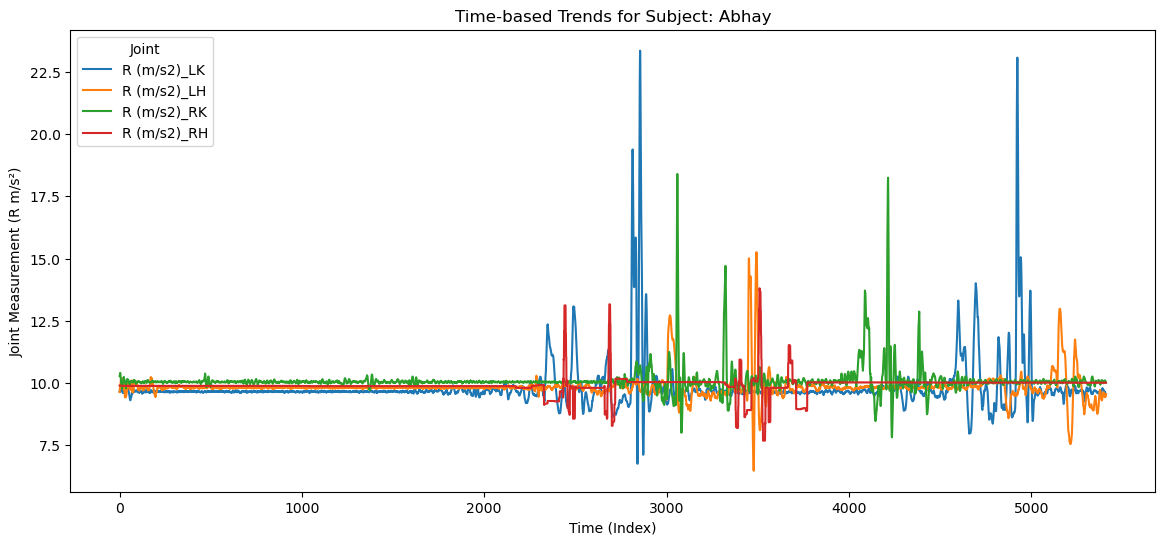

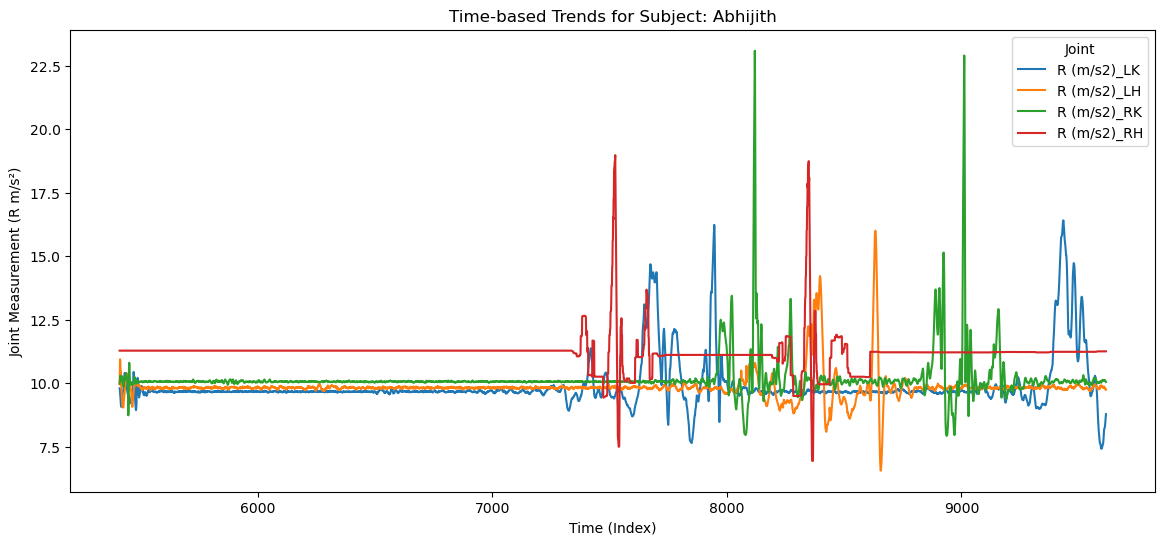

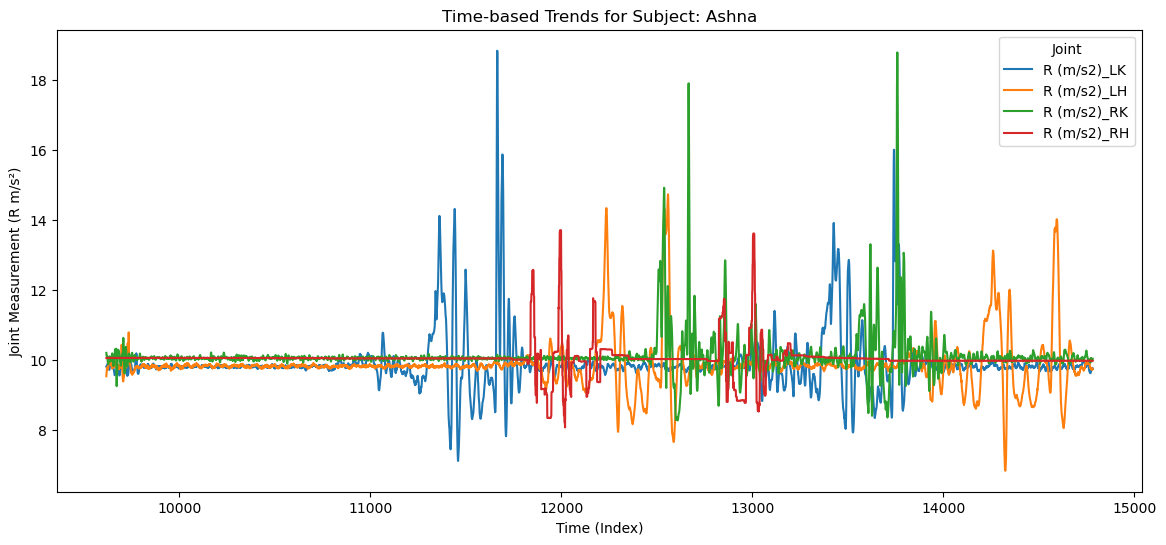

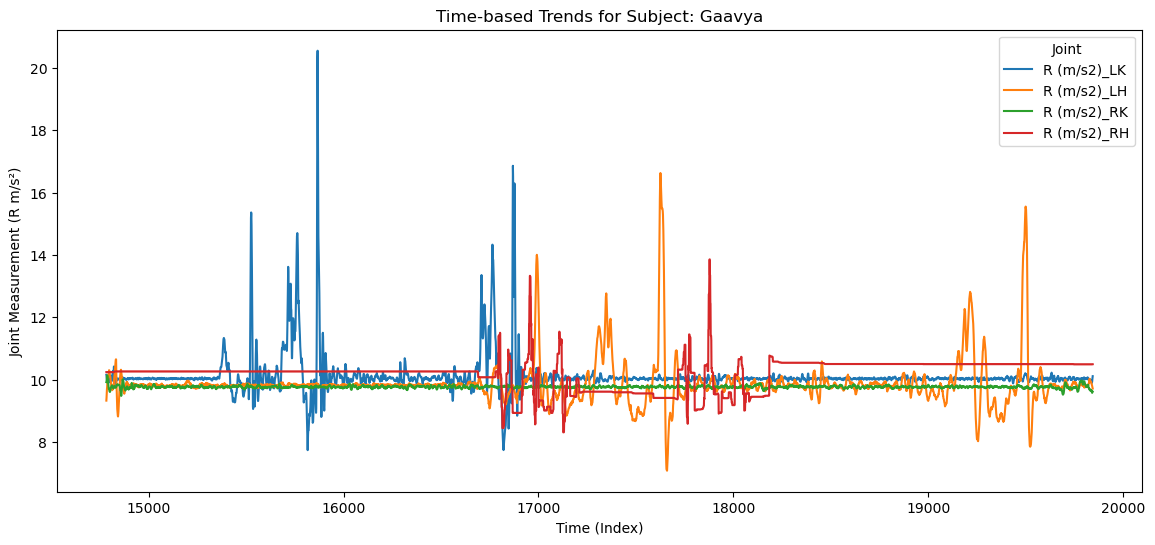

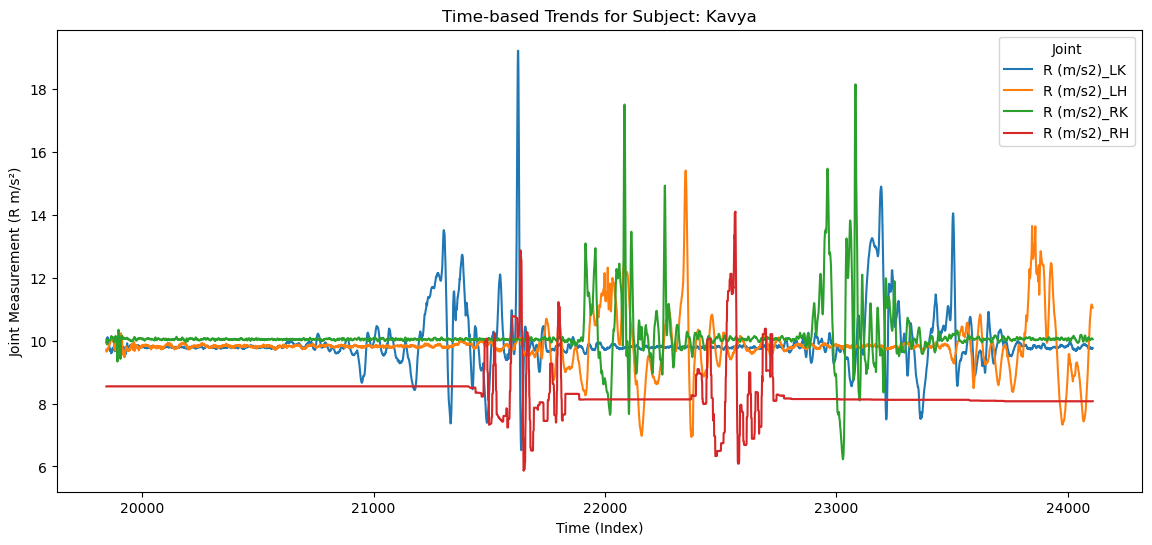

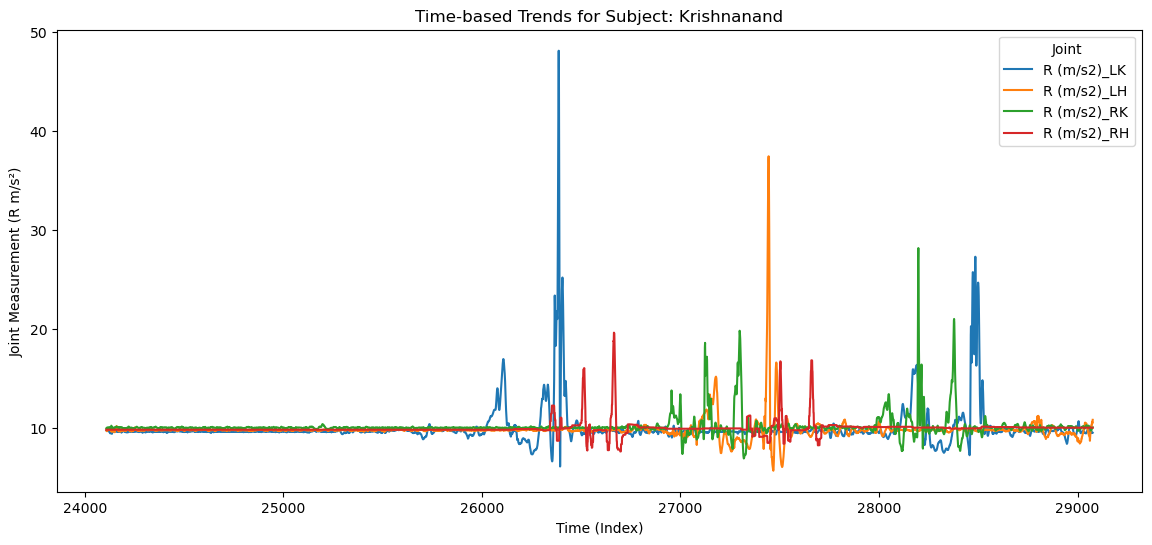

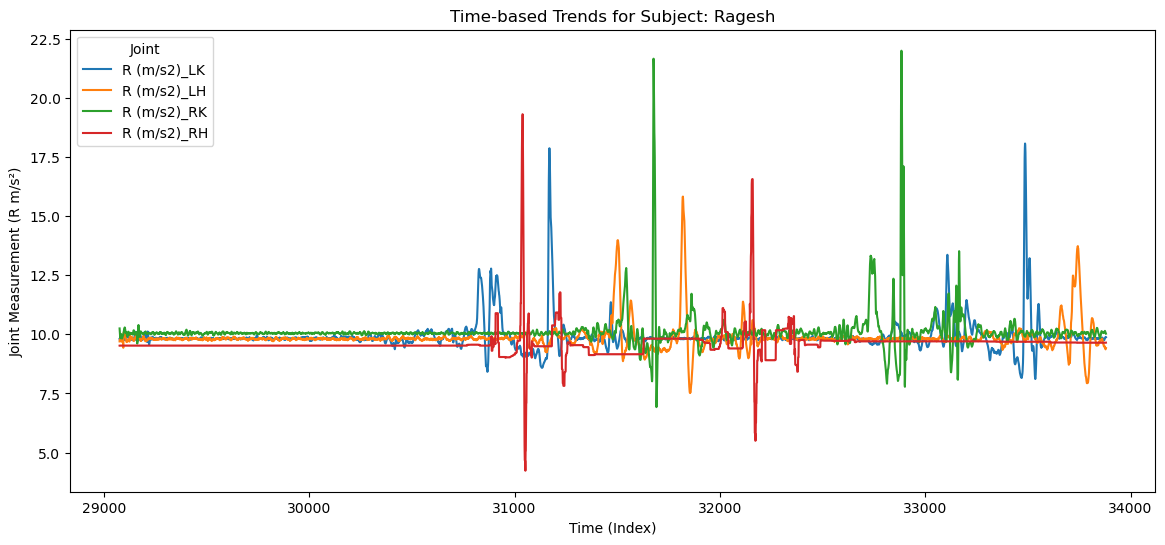

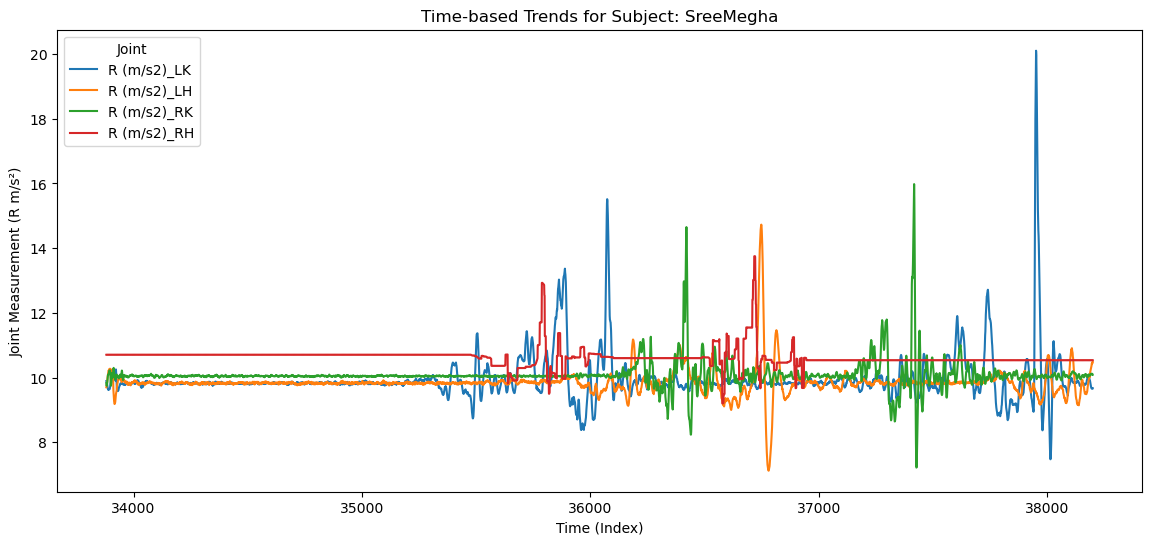

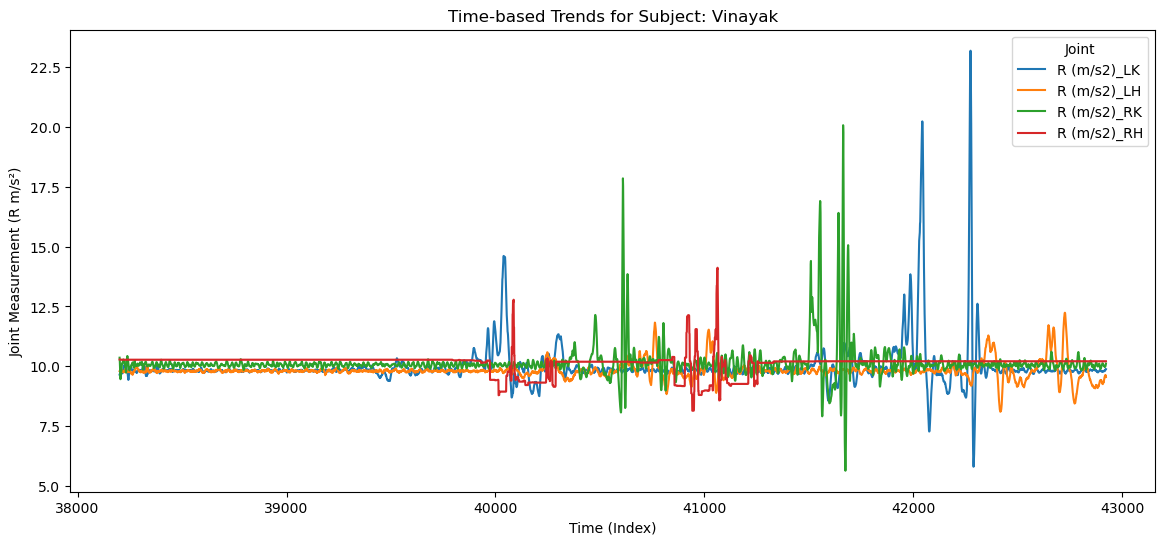

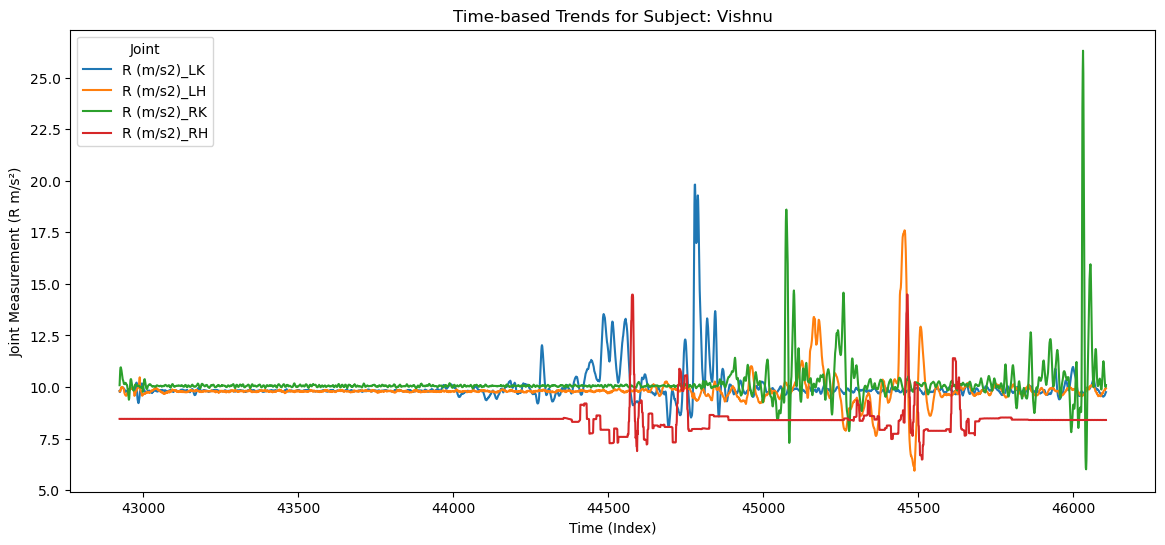

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of joints to visualize (you can expand this list if needed)
joints_of_interest = ['R (m/s2)_LK', 'R (m/s2)_LH', 'R (m/s2)_RK', 'R (m/s2)_RH']

# 1. Plotting time-series trends for each subject and joint
for subject in full_dataset['Subject'].unique():
    subject_data = full_dataset[full_dataset['Subject'] == subject]

    plt.figure(figsize=(14, 6))
    for joint in joints_of_interest:
        sns.lineplot(data=subject_data, x=subject_data.index, y=joint, label=joint)
    
    plt.title(f'Time-based Trends for Subject: {subject}')
    plt.xlabel('Time (Index)')
    plt.ylabel('Joint Measurement (R m/s²)')
    plt.legend(title="Joint")
    plt.show()


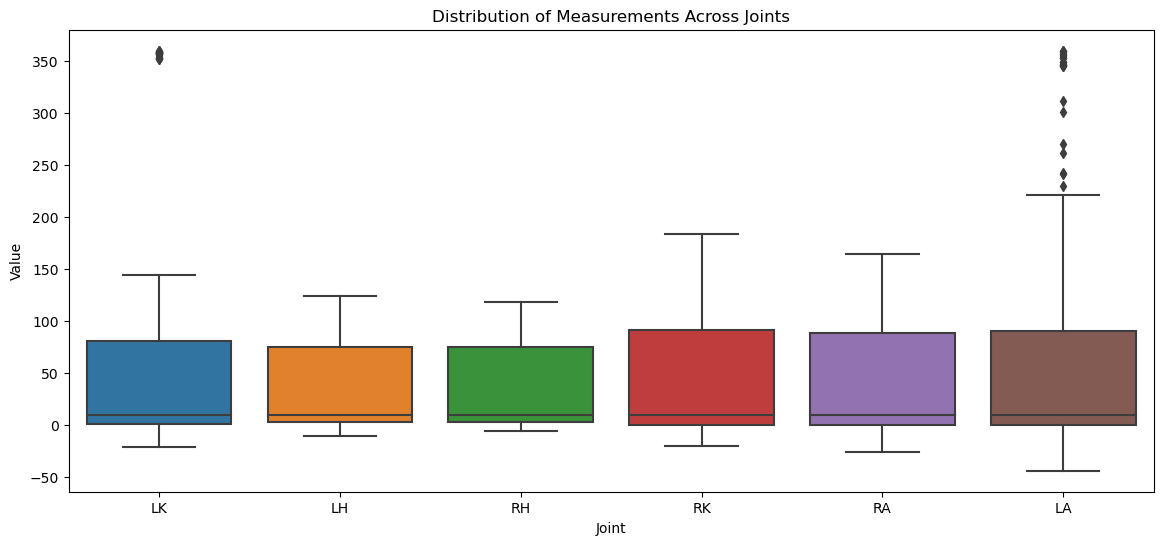

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the full dataset (assuming 'files' and 'genders' are defined as before)
combined_data = []

for subject, filepath in files.items():
    df = pd.read_csv(filepath)
    df["Subject"] = subject
    df["Gender"] = genders[subject]
    combined_data.append(df)

full_dataset = pd.concat(combined_data, ignore_index=True)

# Reshape data to extract 'Joint' from column names for the plot
reshaped_data = full_dataset.melt(
    id_vars=['Subject', 'Gender'], 
    var_name='Measurement', 
    value_name='Value'
)
reshaped_data['Joint'] = reshaped_data['Measurement'].str.extract(r'_(\w+)$')

# Plot: Distribution of Measurements Across Joints
plt.figure(figsize=(14, 6))
sns.boxplot(data=reshaped_data, x='Joint', y='Value')

# Add titles and labels
plt.title('Distribution of Measurements Across Joints')
plt.xlabel('Joint')
plt.ylabel('Value')

# Display the plot
plt.show()


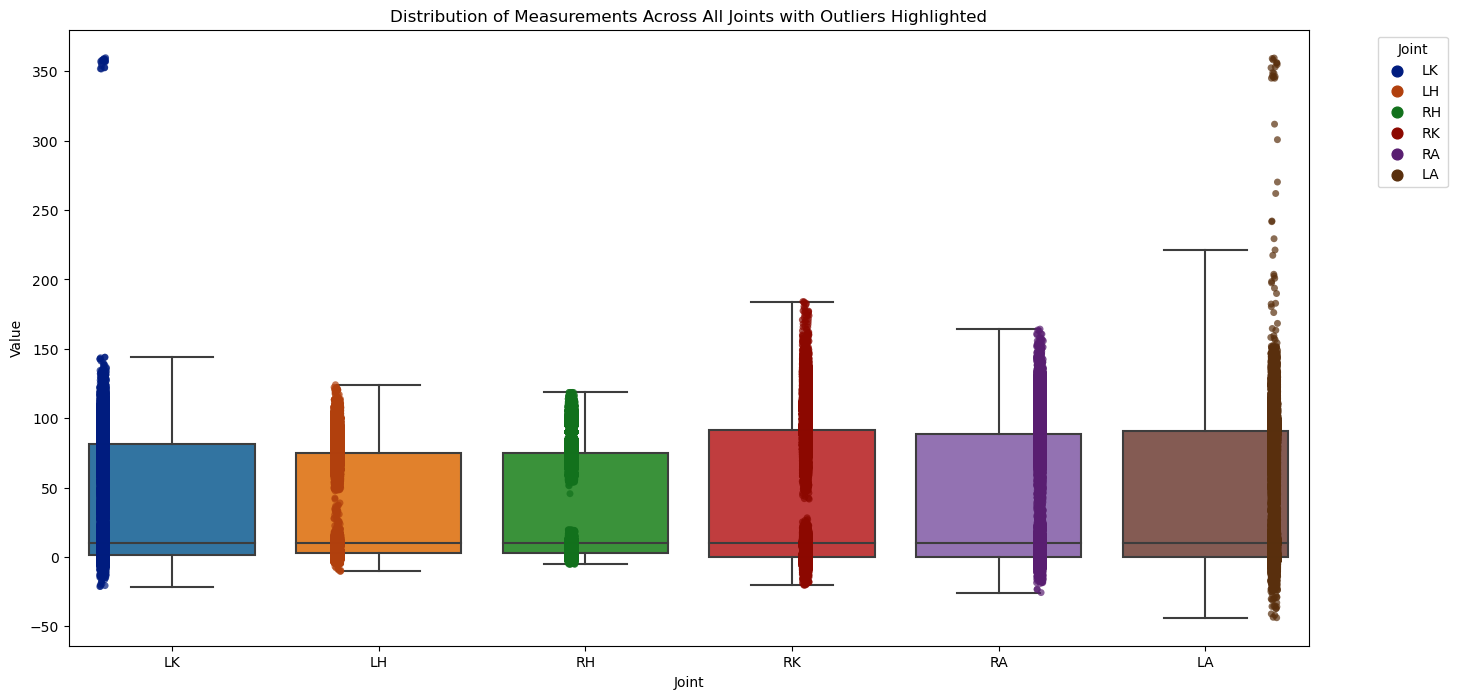

In [20]:
# 3. Identify Outliers: Values Outside 1.5 * IQR for Each Joint
def mark_outliers(group):
    """Adds an 'Outlier' column to mark outliers within each group."""
    Q1 = group['Value'].quantile(0.25)
    Q3 = group['Value'].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    group['Outlier'] = (group['Value'] < lower_bound) | (group['Value'] > upper_bound)
    return group

outliers = reshaped_data.groupby('Joint').apply(mark_outliers).reset_index(drop=True)


# 4. Plot: Box Plot with Outliers Highlighted for All Joints
plt.figure(figsize=(16, 8))

# Plot regular boxplot without showing default outliers
sns.boxplot(data=reshaped_data, x='Joint', y='Value', showfliers=False)

# Overlay outliers using a strip plot
sns.stripplot(data=outliers, x='Joint', y='Value', 
              hue='Joint', palette='dark', dodge=True, 
              marker='o', size=5, alpha=0.7)

# Customize plot appearance
plt.title('Distribution of Measurements Across All Joints with Outliers Highlighted')
plt.xlabel('Joint')
plt.ylabel('Value')
plt.legend(title='Joint', bbox_to_anchor=(1.05, 1), loc='upper left')

# Display the plot
plt.show()
